In [115]:
import pandas as pd
import numpy as np


# numpy-cumulative-histogram

In [139]:
from bokeh.plotting import show, figure, output_notebook, reset_output
from bokeh.models.formatters import NumeralTickFormatter

# \x96 encoding CP1252
df = pd.read_csv('australian_salary.csv', encoding='CP1252', index_col=0)

def bokeh_hist(df, column, weight_column, bins=20, title='', xaxis='', yaxis='', axis=True, plot_width=600, plot_height=400):

    p = figure(title=title, plot_height=plot_height, plot_width=plot_width,
               tooltips='$x：$y', tools='pan,save')
    
    p.title.text_font_size = '12pt'
    p.title.align = 'center'
    p.min_border_left = 35
    p.min_border_bottom = 35
    p.axis.ticker.num_minor_ticks = 0
    p.grid.band_fill_color = None
    if axis == True:
        p.axis.axis_label_text_font_size = "10pt"
        p.axis.major_label_text_font_size = "10pt"
        p.yaxis.axis_label = yaxis
        p.xaxis.axis_label = xaxis
        p.xaxis.formatter = NumeralTickFormatter(format='$0,0a')
        p.yaxis.formatter = NumeralTickFormatter(format='0,0a')
    else:
        p.axis.visible = None
#     hist, edges = np.histogram(df[column], weights=df[weight_column], bins=bins)
    hist, edges = np.histogram(df[column], bins=np.linspace(0, 600000, 31))
    p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
           fill_color="navy", line_color="white", alpha=0.5
          )
    return p

output_notebook()
show(bokeh_hist(df.copy(), 'average_taxable_income', 'individuals', 
                xaxis='平均纳税收入（加元 AUD/年）', 
                yaxis='职业计数（个）',
                bins=30))

Loading BokehJS ...

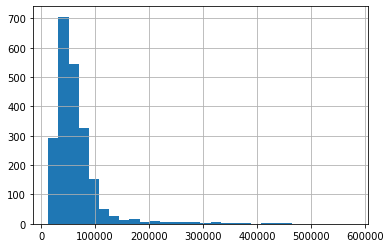

In [116]:
df['average_taxable_income'].hist(bins=30)

In [118]:
df['average_taxable_income'].describe()

count      2197.000000
mean      65678.155212
std       51171.452173
min       13307.000000
25%       38909.000000
50%       53850.000000
75%       74441.000000
max      577674.000000
Name: average_taxable_income, dtype: float64

In [98]:
arr = [1123, 2, 3]
wei = [200, 1, 1]

hist, edges = np.histogram(arr, weights=wei, bins=3)


In [99]:
hist, edges

(array([  2,   0, 200]),
 array([   2.        ,  375.66666667,  749.33333333, 1123.        ]))

In [84]:
df

,gender_rank,occupation,gender,individuals,average_taxable_income
1,795,Abattoir process worker; Meat process worker; ...,Female,5.961000e-12,36359
2,881,Abattoir process worker; Meat process worker; ...,Male,1.724100e-11,40954
3,699,Aboriginal and Torres Strait Islander educatio...,Female,1.386000e-12,40926
4,828,Aboriginal and Torres Strait Islander educatio...,Male,6.360000e-13,44077
5,641,Aboriginal and Torres Strait Islander health l...,Female,1.878000e-12,43545
...,...,...,...,...,...
2193,664,Yarn carding and spinning machine operator,Male,5.900000e-14,53075
2194,705,Youth worker,Female,8.214000e-12,40804
2195,792,Youth worker,Male,5.985000e-12,46328
2196,673,Zookeeper,Female,6.270000e-13,41988


In [122]:
hist, edges = np.histogram(df['average_taxable_income'], bins=30)
hist

array([293, 706, 544, 325, 153,  52,  28,  14,  16,   6,   9,   5,   7,
         7,   5,   3,   5,   2,   4,   3,   0,   2,   3,   3,   0,   0,
         0,   0,   1,   1])

In [123]:
edges

array([ 13307.        ,  32119.23333333,  50931.46666667,  69743.7       ,
        88555.93333333, 107368.16666667, 126180.4       , 144992.63333333,
       163804.86666667, 182617.1       , 201429.33333333, 220241.56666667,
       239053.8       , 257866.03333333, 276678.26666667, 295490.5       ,
       314302.73333333, 333114.96666667, 351927.2       , 370739.43333333,
       389551.66666667, 408363.9       , 427176.13333333, 445988.36666667,
       464800.6       , 483612.83333333, 502425.06666667, 521237.3       ,
       540049.53333333, 558861.76666667, 577674.        ])

In [124]:
np.linspace(0, 600000, 30)

array([     0.        ,  20689.65517241,  41379.31034483,  62068.96551724,
        82758.62068966, 103448.27586207, 124137.93103448, 144827.5862069 ,
       165517.24137931, 186206.89655172, 206896.55172414, 227586.20689655,
       248275.86206897, 268965.51724138, 289655.17241379, 310344.82758621,
       331034.48275862, 351724.13793103, 372413.79310345, 393103.44827586,
       413793.10344828, 434482.75862069, 455172.4137931 , 475862.06896552,
       496551.72413793, 517241.37931034, 537931.03448276, 558620.68965517,
       579310.34482759, 600000.        ])

In [143]:
df[df['gender'] == 'Male'].sort_values(by='gender_rank')


,gender_rank,occupation,gender,individuals,average_taxable_income
1550,1,Neurosurgeon,Male,142,577674
1598,2,Ophthalmologist,Male,423,552947
482,3,Cardiologist,Male,651,453253
1686,4,Plastic and reconstructive surgeon,Male,237,448530
1204,5,Gynaecologist; Obstetrician,Male,641,446507
...,...,...,...,...,...
2132,1100,Vegetable picker,Male,921,19979
231,1101,Apprentice or trainee – sport and recreation,Male,210,19586
1024,1102,Fast food cook; Fish and chip cook; Hamburger ...,Male,14686,18988
171,1103,Apprentice or trainee – florist,Male,3,18100
